In [2]:
import requests
import json
from citipy import citipy
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

#for citipy documentations, see https://github.com/wingchen/citipy

In [3]:
#set how many pulls will be done. This is to make sure we are not overlimit

pull_number = 30
half_number = int(pull_number/2)

half_number

15

In [4]:
# Down the line, we are required to split between souther and northen hemisphere for regression
# let's make it so first 50% of pull is for north, the rest of 50% is for south

#Create random latt and longitude
north_lat = []
south_lat = []

north_lon = []
south_lon = []

lat = []
lon = []


        

In [5]:
for x in range(0 , half_number):
        a = random.uniform(0,70.0)
        b = random.uniform(-70.0,70.0)
        north_lat.append(a)
        north_lon.append(b)        
        lat.append(a)
        lon.append(b)
for y in range(half_number, pull_number ):
        a = random.uniform(-70.0,-0.1)
        b = random.uniform(-70.0,70.0)
        south_lat.append(a)
        south_lon.append(b)        
        lat.append(a)
        lon.append(b) 

In [6]:
lat

[1.000148539420257,
 20.61347278176747,
 61.426164447221055,
 63.77857961109895,
 64.70457756612983,
 19.958400107401378,
 60.696927843508185,
 60.05784128766299,
 44.799545057589135,
 3.4165250448508067,
 47.42814049715737,
 65.78785519778394,
 41.37041349414153,
 12.647032067393859,
 1.6948995136247014,
 -37.303220147536464,
 -18.602236621001346,
 -54.91558168136727,
 -13.142397760045455,
 -45.7357313144478,
 -59.07527349639838,
 -55.80812657470695,
 -38.141186699269724,
 -56.41463216416476,
 -42.06168981239206,
 -55.564560947835574,
 -47.580669658432456,
 -54.23222726748458,
 -58.33301191267307,
 -2.634199898333165]

In [7]:
#Create json pull request.

url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=a3080dc4dc4f2b07d48f140771b213ff"

#Singular key trial
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
descriptions = []
lat_temp = []
lon_temp = []


In [8]:
#Looping the request
y = 0

#remember, set the last number in range() to limit how many request per pull. 
for y in range(0,pull_number):
    url_lat = "http://api.openweathermap.org/data/2.5/weather?lat="+ str(lat[y]) + "&lon=" +str(lon[y]) + "&appid=a3080dc4dc4f2b07d48f140771b213ff"
    response = requests.get(url_lat)
    weather = response.json()
    temperature.append(weather["main"]["temp"])
    humidity.append(weather["main"]["humidity"])
    cloudiness.append(weather["clouds"]["all"])
    wind_speed.append(weather["wind"]["speed"])
    lat_temp.append(lat[y])
    lon_temp.append(lon[y])
    city = citipy.nearest_city(lat[y], lon[y])
    city_name.append(city.city_name)
    printout = ("City name is: " +str(city_name[y]),
               "Temperature is: " +str(temperature[y]) + " Fahrenheit",
                "Humidity is: " +str(humidity[y]) +" %",
                "Cloudiness is: "+str(cloudiness[y]) +" %",
                "Wind Speed is: "+str(wind_speed[y])  +" mph"
               )
    descriptions.append(printout)
    
    


In [9]:
# fill this cell with writing output to CSV
ind = np.arange(0,len(descriptions) )
city_out = pd.DataFrame({"City Prints": descriptions,
             "Index":ind}).set_index("Index")
out_path = ("output/city_desc.csv")
city_out.to_csv(out_path)

In [27]:
#cells above requires pull. Be wary of doing too many pulls!


This scatter plot is trying to find relationship between latitude to temperature (F)


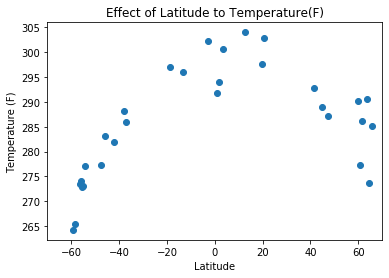

In [11]:
#Create Scatter Plot 1
#Temperature (F) vs Latitude 





plt.scatter(x = lat_temp, y=temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Latitude to Temperature(F)")
plt.xlim(-70,70)
plt.savefig("output/scatter1")

print("This scatter plot is trying to find relationship between latitude to temperature (F)")

This scatter plot is trying to find relationship between latitude to humidity


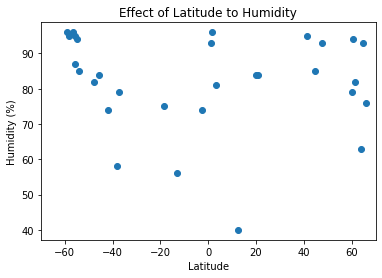

In [12]:
#Create Scatter Plot 2
#Humidity (%) vs Latitude
plt.scatter(x = lat_temp, y=humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Effect of Latitude to Humidity")
plt.xlim(-70,70)
plt.savefig("output/scatter2")
print("This scatter plot is trying to find relationship between latitude to humidity")

This scatter plot is trying to find relationship between latitude to cloudiness


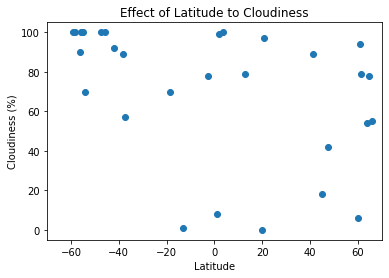

In [13]:
#Create Scatter Plot 3
#Cloudiness (%) vs Latitude
plt.scatter(x = lat_temp, y=cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Effect of Latitude to Cloudiness")
plt.xlim(-70,70)
plt.savefig("output/scatter3")
print("This scatter plot is trying to find relationship between latitude to cloudiness")

This scatter plot is trying to find relationship between latitude to wind speed


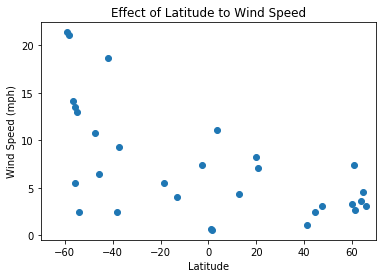

In [14]:
#Create Scatter Plot 4
#Wind Speed vs Latitude
plt.scatter(x = lat_temp, y=wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Effect of Latitude to Wind Speed")
plt.xlim(-70,70)
plt.savefig("output/scatter4")
print("This scatter plot is trying to find relationship between latitude to wind speed")

In [105]:
#Automated
#The values stored in n_values and s_values are temperature, humidity, cloud, and wind speed. In that order!

n_values = []
s_values = []

#This is to make the latitude usable 
north_lat = np.asarray(north_lat)
south_lat = np.asarray(south_lat)

In [112]:
#The North Loop. Basically, we add list of list

a=[]
for j in range (0,half_number):
    a.append(temperature[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(humidity[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(cloudiness[j] )
n_values.append(a)

a=[]
for j in range (0,half_number):
    a.append(wind_speed[j] )
n_values.append(a)

#for i in range (0, half_number):
#    n_values.append(humidity[i] )
   # n_values.append (cloudiness[i] )
    #n_values.append (wind_speed[i])


In [114]:
#The South Loop
a=[]
for j in range (half_number, pull_number):
    a.append(temperature[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(humidity[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(cloudiness[j] )
s_values.append(a)

a=[]
for j in range (half_number, pull_number):
    a.append(wind_speed[j] )
s_values.append(a)



In [29]:
#Receptacle for North and South
n_temp = []
s_temp = []
n_hum = []
s_hum = []
n_cloud = []
s_cloud = []
n_wind = []
s_wind = []




In [30]:
#  North and South

for i in range (0, half_number):
    n_temp.append(temperature[i] )
    n_hum.append(humidity[i] )
    n_cloud.append (cloudiness[i] )
    n_wind.append (wind_speed[i])
    
for j in range (half_number, pull_number):
    s_temp.append(temperature[j] )
    s_hum.append(humidity[j] )
    s_cloud.append (cloudiness[j] )
    s_wind.append (wind_speed[j])

len(n_temp)

15

In [31]:
slope=[]
intercept =[]
rvalue=[]
pvalue=[]
stderr=[]


In [32]:
#linear regression on north and south
#linr_n_tem

slope=[]
intercept =[]
rvalue=[]
pvalue=[]
stderr=[]

#append.slope, append.intercept, append.rvalue, append.pvalue, append.stderr = st.linregress(north_lat, n_temp)
slope1, intercept1, rvalue1, pvalue1, stderr1 = st.linregress(north_lat, n_temp)
slope2, intercept2, rvalue2, pvalue2, stderr2 = st.linregress(south_lat, s_temp)

slope3, intercept3, rvalue3, pvalue3, stderr3 = st.linregress(north_lat, n_hum)
slope4, intercept4, rvalue4, pvalue4, stderr4 = st.linregress(south_lat, s_hum)

slope5, intercept5, rvalue5, pvalue5, stderr5 = st.linregress(north_lat, n_cloud)
slope6, intercept6, rvalue6, pvalue6, stderr6 = st.linregress(south_lat, s_cloud)

slope7, intercept7, rvalue7, pvalue7, stderr7 = st.linregress(north_lat, n_wind)
slope8, intercept8, rvalue8, pvalue8, stderr8 = st.linregress(south_lat, s_wind)


In [40]:
#linear regression on so

val1 = intercept1 + slope1 * north_lat
val2 = intercept2 + slope2 * south_lat

val3 = intercept3 + slope3 * north_lat
val4 = intercept4 + slope4 * south_lat

val5 = intercept5 + slope5 * north_lat
val6 = intercept6 + slope6 * south_lat

val7 = intercept7 + slope7 * north_lat
val8 = intercept8 + slope8 * south_lat


Text(2.3835497261151435, 280.404, 'y =300.377+ -0.251x')

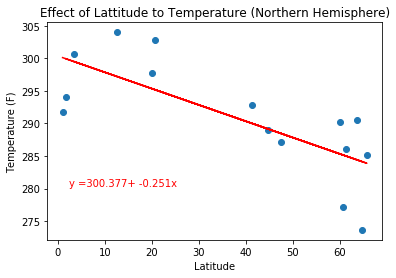

In [55]:
#Scatter Plots and Regressions
#Plot1

plt.scatter(north_lat, n_temp)
plt.plot(north_lat, val1, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Lattitude to Temperature (Northern Hemisphere)")
desc1 = "y =" + str(round(intercept1,3)) + "+ "+ str(round(slope1,3)) + "x"

xcor = np.quantile(north_lat, 0.1)
ycor=np.quantile(n_temp, 0.1)
plt.annotate(desc1, (xcor, ycor),color = "red" )


In [ ]:
#Scatter Plots and Regressions
#Plot2

plt.scatter(north_lat, n_temp)
plt.plot(north_lat, val1, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Effect of Lattitude to Temperature (Northern Hemisphere)")
desc1 = "y =" + str(round(intercept1,3)) + "+ "+ str(round(slope1,3)) + "x"

xcor = np.quantile(north_lat, 0.1)
ycor=np.quantile(n_temp, 0.1)
plt.annotate(desc1, (xcor, ycor),color = "red" )
